<a href="https://colab.research.google.com/github/torcuata22/pytorch_intro/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
#create neural network to classify iris flowers using the iris dataset: https://archive.ics.uci.edu/dataset/53/iris
!pip install torch
import torch
import torch.nn as nn #create neural network
import torch.nn.functional as F #move data forward in the function



In [133]:
#create Model Class that inherits the nn.Module
class Model(nn.Module):
  #input layer(4 features of hte flower) --> hidden layer1, H1 (some number of neurons)--> hidden layer 2, H2 (some number of neurons) --> output (3 classes of iris flowers)

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() #initializes parent class, without this I get an error (instantiates nn.Module)
    self.fc1 = nn.Linear(in_features, h1) #fc=fully connected, we do this for each layer
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features) #output layer

  #create function to move everything forward:
  def forward(self, x):
    x = F.relu(self.fc1(x))  #push to first layer relu: rectified linear unit, if result < 0, use zero
    x = F.relu(self.fc2(x))  #push to second layer
    x = self.out(x)              #push to output layer

    return x


In [134]:
#before we turn it on, create manual seed, pick a manual seed for randomization

torch.manual_seed(41)

#create instance of the modl:
model = Model()

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [136]:
#create url to upload the data (use the url from theb "raw" dataset in github)
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [115]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [137]:
#change last columns from string to floats (will use as ints later)
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)

In [117]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [138]:
#train, test, split
#axis=1 indicates you want to drop a column (to drop a row, use axis=0)
X = my_df.drop('variety', axis=1)
y = my_df.drop('variety', axis=1)

In [139]:
X = X.values
y = y.values

In [120]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [140]:
from sklearn.model_selection import train_test_split
# Convert NumPy arrays to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [141]:
#Train Test Aplit
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=41)

In [142]:
#convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [154]:
#Convert y labels to tensors long tensors (64 instead of 32 bits)

# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [152]:
#set criterion of model to measure the error (how far off predictions are from data):
criterion = nn.CrossEntropyLoss()

#choose Adam Optimizer, set learning rate(lr)--> if error doesn't diminish after several iterations (epochs), lower learing rate)
#model.parameters are the layers of the neural network (from the class instance)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [126]:
model.parameters


<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=3, bias=True)
)>

In [127]:
print(model)
print(list(model.parameters()))

Model(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=3, bias=True)
)
[Parameter containing:
tensor([[-0.2636, -0.2734,  0.3005, -0.3308],
        [-0.2350,  0.2720, -0.3718,  0.2452],
        [ 0.3045,  0.1357,  0.0896,  0.1933],
        [ 0.3782,  0.0407, -0.3600,  0.4613],
        [ 0.3666, -0.0116, -0.2923, -0.1937],
        [-0.4415,  0.3314, -0.0434,  0.3445],
        [ 0.1883, -0.0992, -0.3197,  0.1740],
        [-0.3208, -0.1111,  0.2972, -0.2723],
        [-0.0245, -0.0679,  0.0573,  0.4814],
        [ 0.2923, -0.1877,  0.4425, -0.1626],
        [ 0.2060,  0.2069, -0.0151, -0.4653],
        [ 0.4701, -0.1155,  0.3405, -0.2999],
        [-0.0510,  0.4287, -0.4339,  0.0193],
        [-0.0065, -0.4273, -0.0969, -0.4583],
        [ 0.1080,  0.0842,  0.2861,  0.0125],
        [-0.2013, -0.1803, -0.1867,  0.3890]], requires_grad=True), Parameter containing:
tensor([ 0

In [54]:
#Train my model:

In [164]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
y_train = y_train[:120]

# Clamp the values in y_train
#y_train = y_train.clamp(min=0, max=2)

epochs = 400
losses = []

for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 4.966017058904981e-06
Epoch: 10 and loss: 4.9014465730579104e-06
Epoch: 20 and loss: 4.838862423639512e-06
Epoch: 30 and loss: 4.78025231132051e-06
Epoch: 40 and loss: 4.72064812129247e-06
Epoch: 50 and loss: 4.666012046072865e-06
Epoch: 60 and loss: 4.601440650731092e-06
Epoch: 70 and loss: 4.552764494292205e-06
Epoch: 80 and loss: 4.497134341363562e-06
Epoch: 90 and loss: 4.43852422904456e-06
Epoch: 100 and loss: 4.3799136619782075e-06
Epoch: 110 and loss: 4.334217464929679e-06
Epoch: 120 and loss: 4.2775936890393496e-06
Epoch: 130 and loss: 4.227924819133477e-06
Epoch: 140 and loss: 4.178254584985552e-06
Epoch: 150 and loss: 4.129577973799314e-06
Epoch: 160 and loss: 4.079907739651389e-06
Epoch: 170 and loss: 4.034211997350212e-06
Epoch: 180 and loss: 3.983548594987951e-06
Epoch: 190 and loss: 3.941825525544118e-06
Epoch: 200 and loss: 3.891162577929208e-06
Epoch: 210 and loss: 3.843479589704657e-06
Epoch: 220 and loss: 3.796790224441793e-06
Epoch: 230 and loss: 3

In [150]:
print(y_pred.shape)
print(y_train.shape)

torch.Size([120, 3])
torch.Size([120, 4])


In [149]:
print(y_pred.dtype)
print(y_train.dtype)


torch.float32
torch.int64


In [159]:
#graph loses:

Text(0.5, 0, 'epochs')

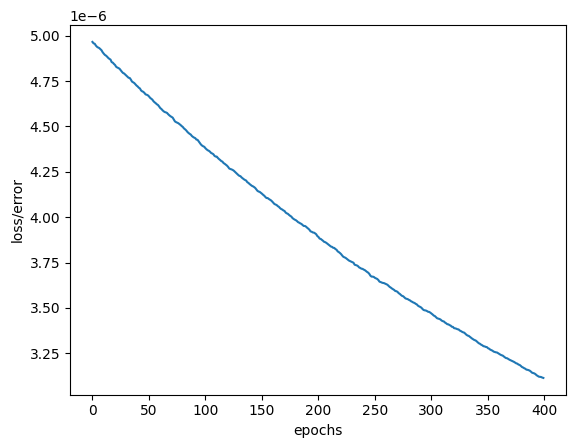

In [165]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epochs")